You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1.  Pregnancies: Number of times pregnant (integer)
2.  Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing


Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
data = pd.read_csv(url)


In [4]:
# Explore the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizations
1.Histograms: To understand the distribution of each feature.


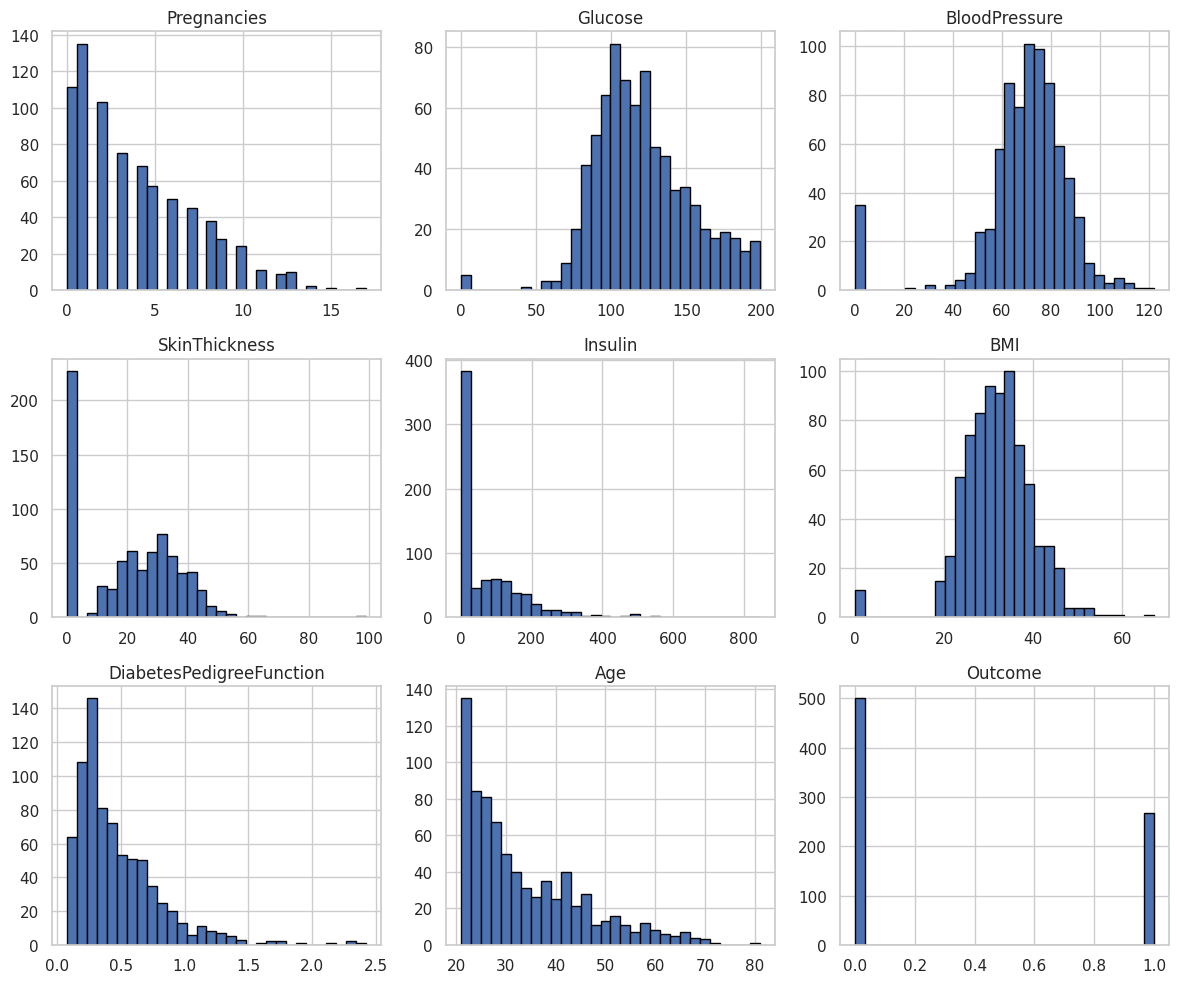

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")
# Plot histograms for each feature
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Correlation Matrix:
To see relationships between features and the target variable.


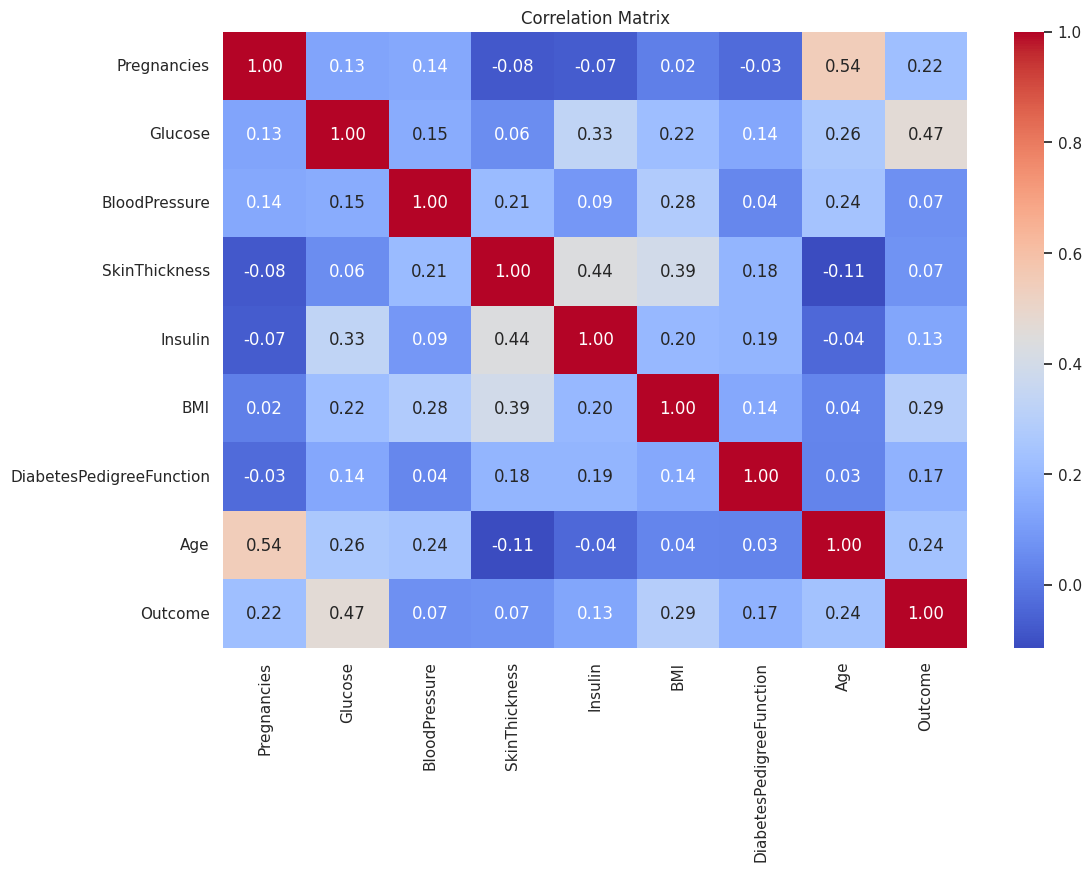

In [17]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Pairplot:
To visualize relationships between features.


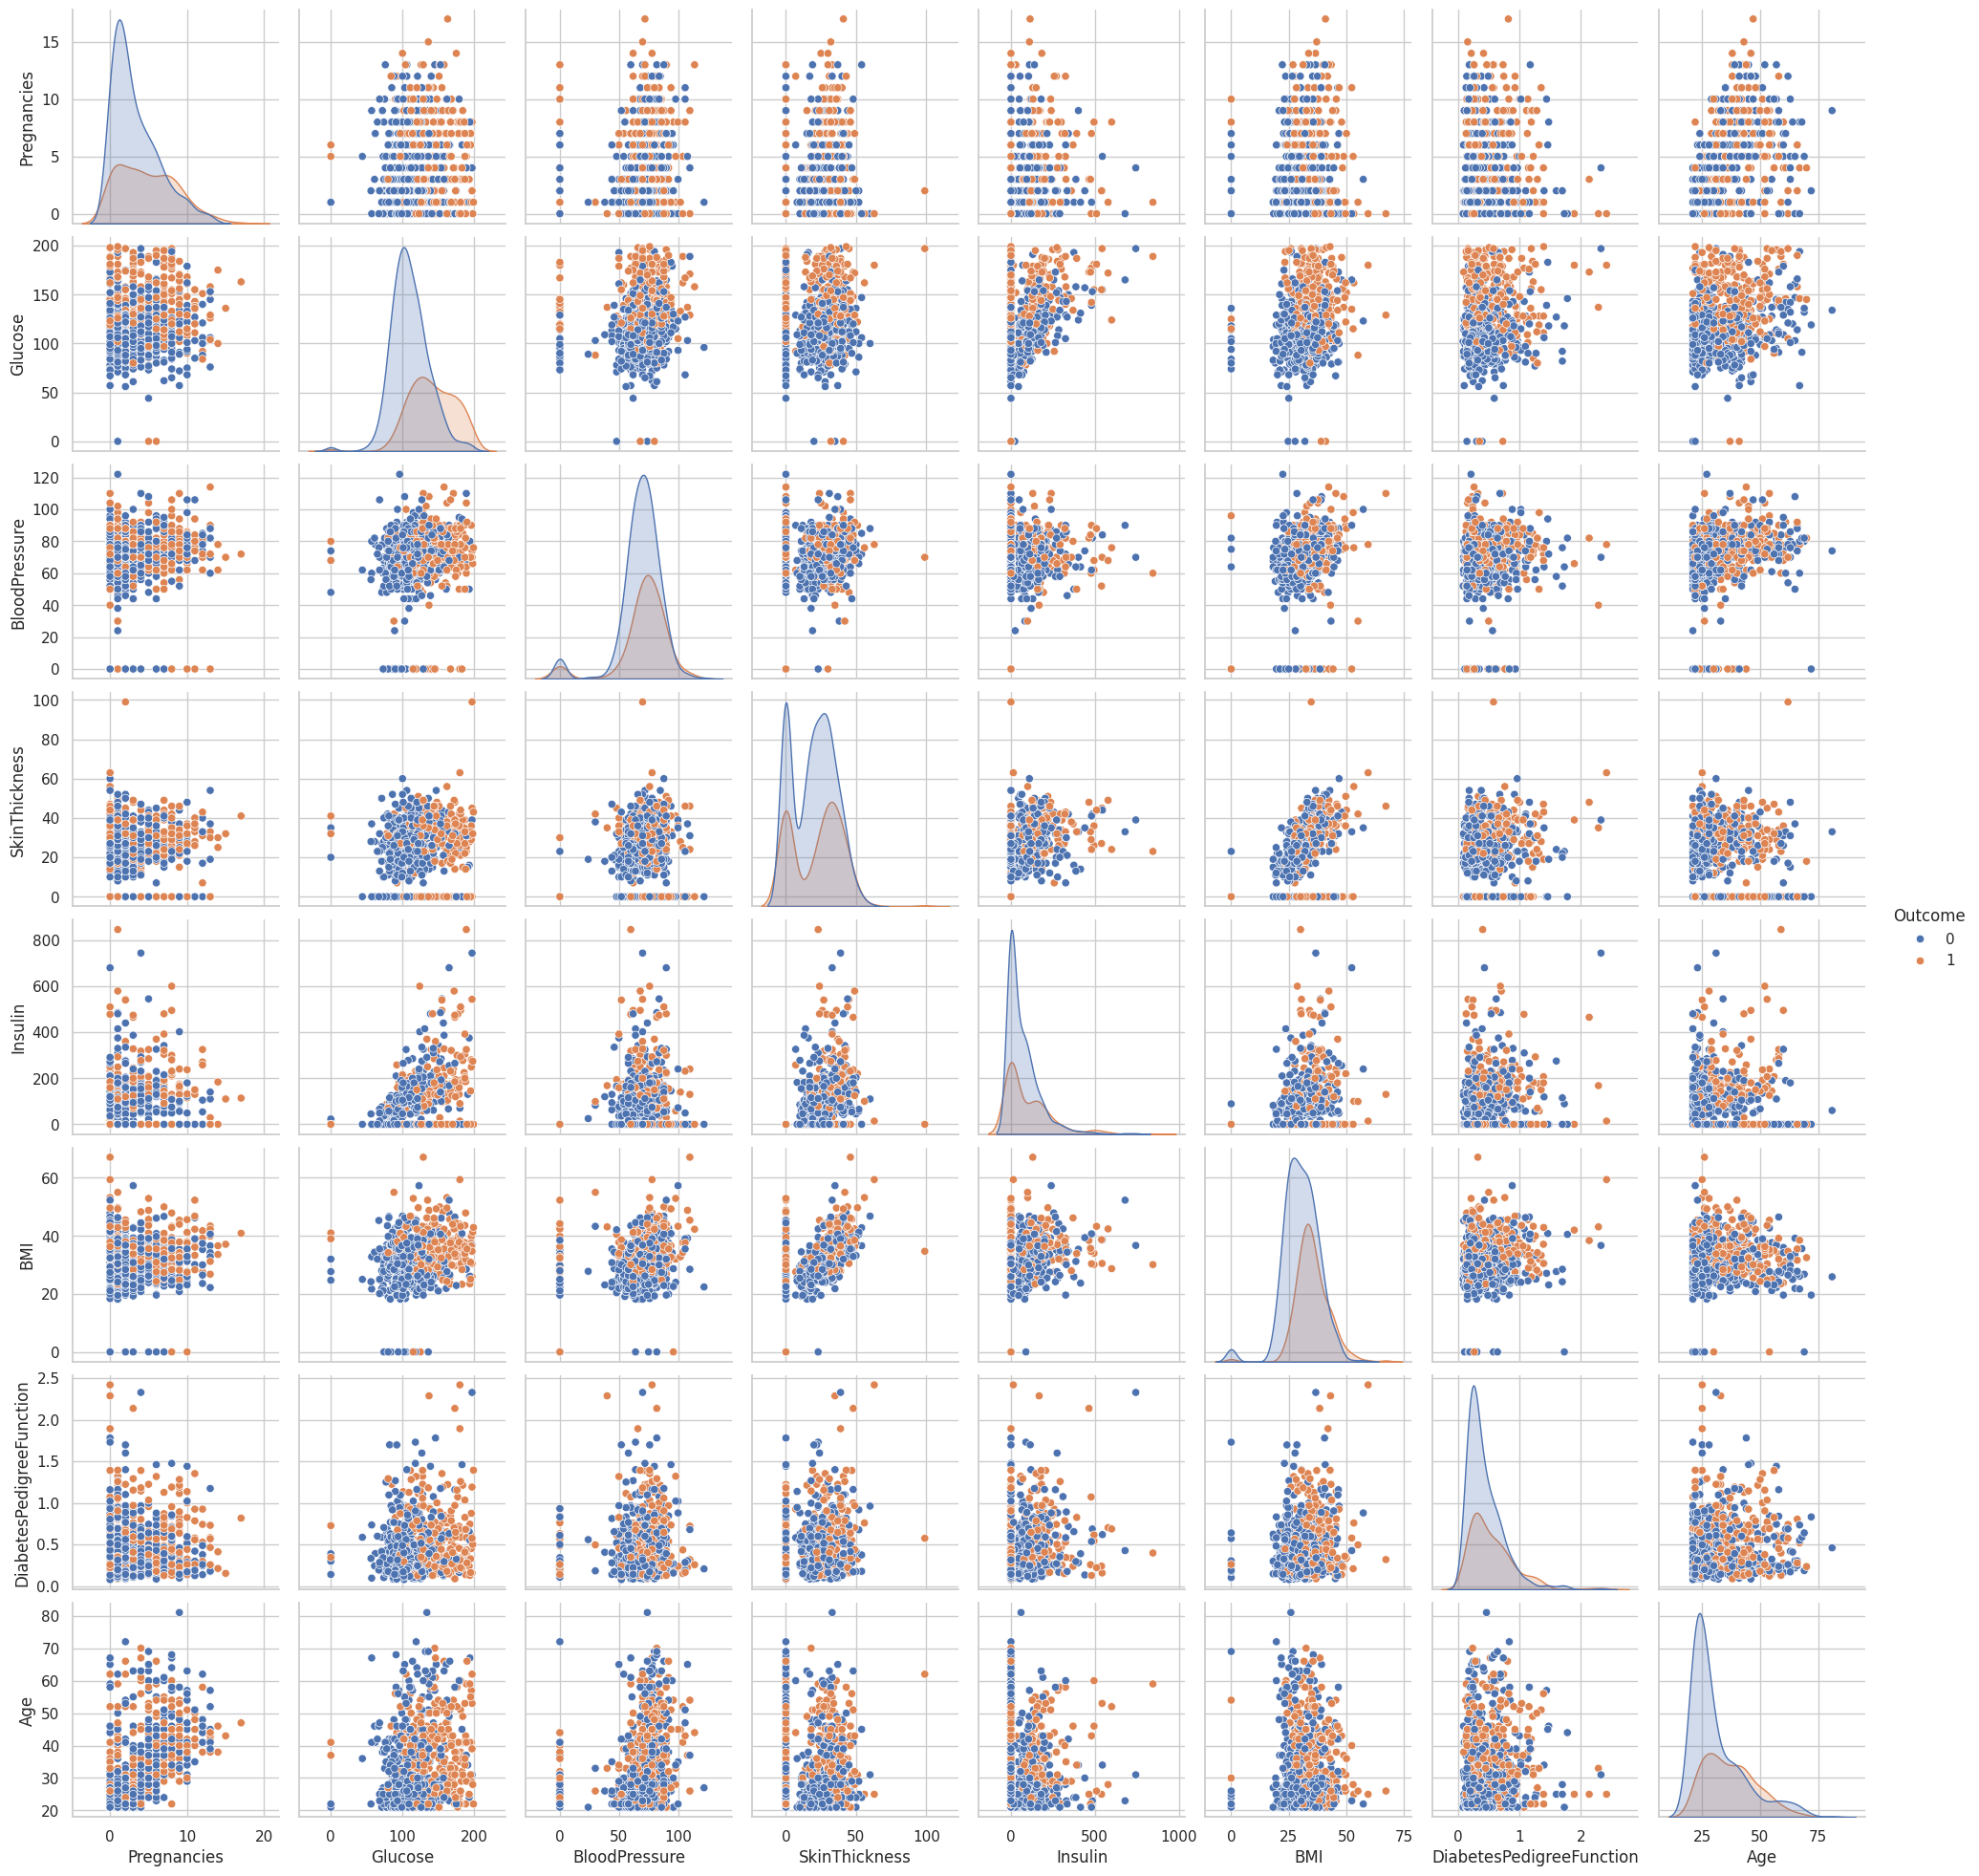

In [18]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()


In [7]:
# Split into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = clf.predict(X_test)


In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



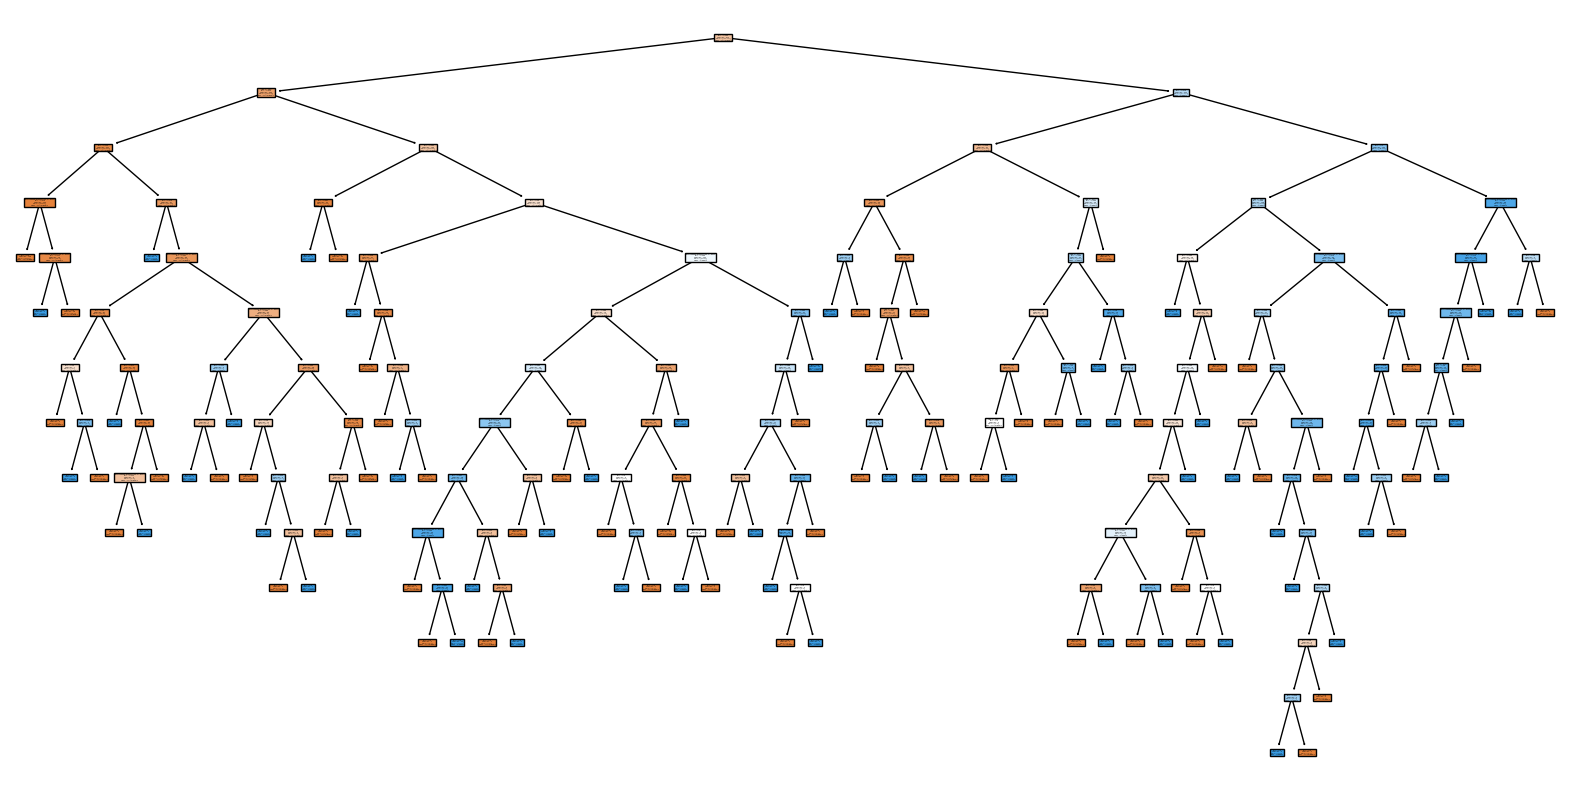

In [15]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

## 1. Cleaning Missing Values

Check for missing values and handle them appropriately. In this case, it’s important to verify if there are any missing values and decide on an imputation strategy or whether to drop those rows/columns.



In [19]:
# Check for missing values
print(data.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Handle missing values (if any)
# For example, you can fill missing values with the mean or median for numeric features
# data.fillna(data.mean(), inplace=True)  # For numeric columns


## 2. Removing Outliers
Identify and handle outliers. Common methods include using statistical techniques like Z-scores or IQR (Interquartile Range). Here’s an example using the IQR method:



In [20]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    data = remove_outliers(data, col)


In [21]:
numeric_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3. Transforming Categorical Variables
In your dataset, all variables are numeric, so no categorical transformation is needed. However, if you had categorical variables, you would convert them to dummy variables as follows:



In [23]:
# Example of converting categorical variables to dummy variables
# data = pd.get_dummies(data, columns=['categorical_column'])


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [24]:
# Split the data into training and testing sets
# Use a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (614, 8)
Test set shape: (154, 8)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

## 1. Train a Decision Tree Model
Use the DecisionTreeClassifier from scikit-learn to train the model. We'll also use GridSearchCV for hyperparameter tuning.



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)


In [27]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # 'entropy' is used for ID3-like behavior
}


In [28]:
param_grid

{'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'criterion': ['gini', 'entropy']}

## 2. Hyperparameter Optimization with Cross-Validation
We’ll use GridSearchCV to find the best hyperparameters for the decision tree. Key hyperparameters include the maximum depth of the tree and the minimum samples per leaf.



In [29]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [30]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [32]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score:  0.7410635745701718


In [33]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score: ", test_score)


Test set score:  0.7597402597402597


In [34]:
# Optional: Cross-validation scores on the training data
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores on training data: ", cv_scores)
print("Mean CV score: ", np.mean(cv_scores))


Cross-validation scores on training data:  [0.73170732 0.77235772 0.70731707 0.7398374  0.75409836]
Mean CV score:  0.7410635745701718


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

## 1. Compute Evaluation Metrics
You can use scikit-learn to calculate accuracy, precision, recall, F1 score, and confusion matrix.



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Predict on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [37]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Accuracy:  0.7597402597402597
Precision:  0.6730769230769231
Recall:  0.6363636363636364
F1 Score:  0.6542056074766355


## 2. Plot Confusion Matrix
A confusion matrix helps you visualize the performance of the classification model in terms of true positives, true negatives, false positives, and false negatives.



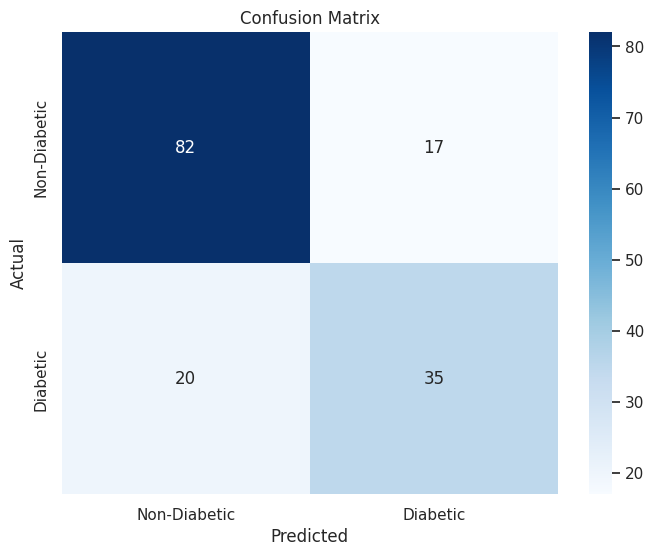

In [38]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 3. Plot ROC Curve
The ROC (Receiver Operating Characteristic) curve helps evaluate the performance of the model at various threshold settings.



In [39]:
# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


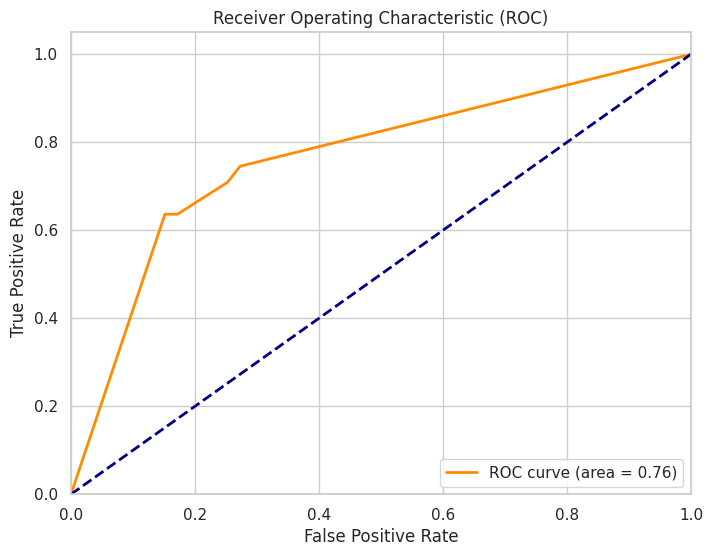

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

## Visualizing the Decision Tree


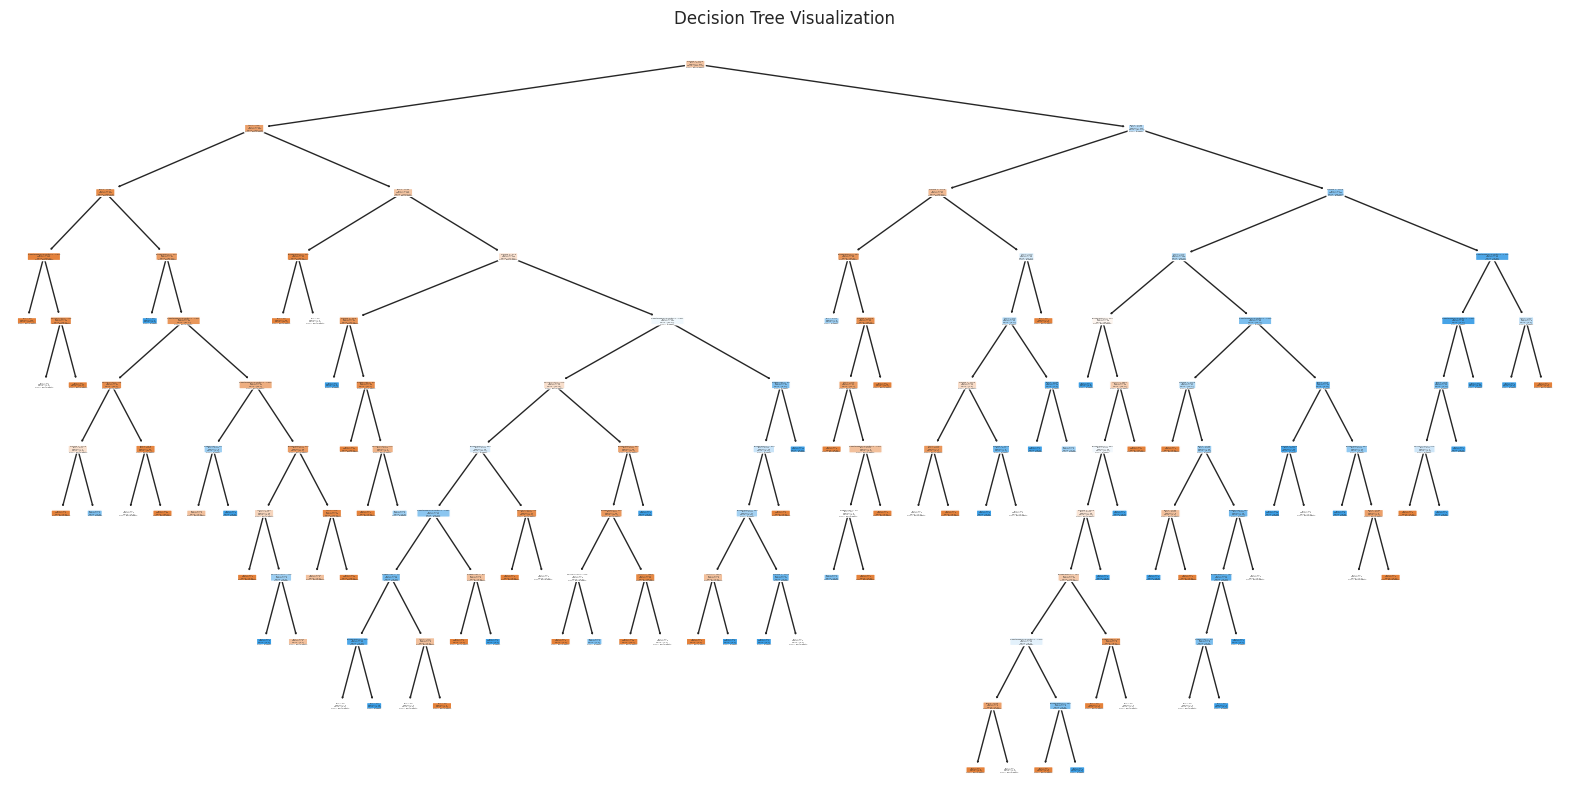

In [41]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


## Extracting Feature Importances


In [42]:
# Get feature importances
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)


Feature Importances:
                     Feature  Importance
1                   Glucose    0.338277
2             BloodPressure    0.162612
5                       BMI    0.151391
7                       Age    0.115160
6  DiabetesPedigreeFunction    0.068051
3             SkinThickness    0.063185
0               Pregnancies    0.060427
4                   Insulin    0.040897


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

## 1. Apply the Model to New Data
Assume you have new data in a DataFrame called new_data. Ensure it has the same structure as the training data (with the same features).



In [43]:
# Example new data (make sure to preprocess it similarly to the original dataset)
new_data = pd.DataFrame({
    'Pregnancies': [2, 5],
    'Glucose': [130, 200],
    'BloodPressure': [70, 90],
    'SkinThickness': [30, 35],
    'Insulin': [150, 200],
    'BMI': [25.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 1.0],
    'Age': [35, 50]
})

# Predict on new data
new_predictions = best_model.predict(new_data)
print("New data predictions: ", new_predictions)


New data predictions:  [0 1]


## 2. Sensitivity Analysis
Evaluate how small changes in the input features affect predictions. Here’s an example where you perturb one feature at a time:



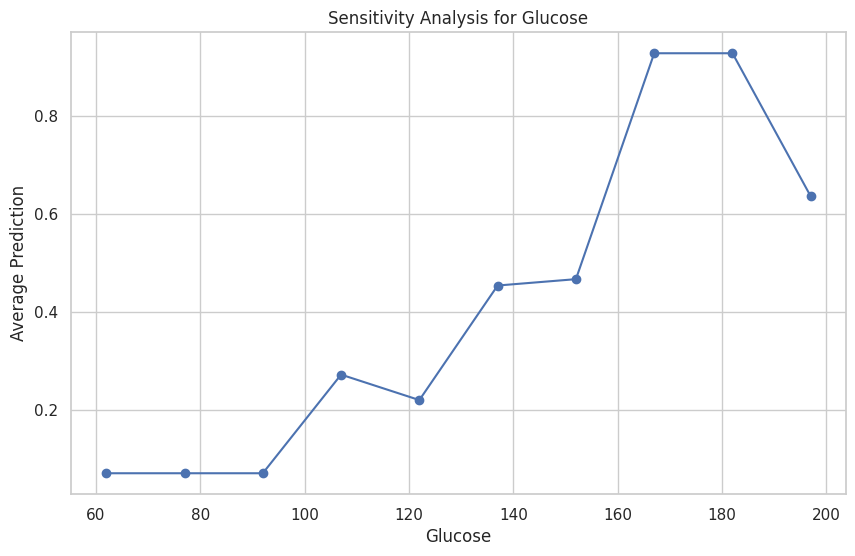

In [44]:
def sensitivity_analysis(model, X, feature_name):
    original_values = X[feature_name].copy()
    perturbation = np.linspace(X[feature_name].min(), X[feature_name].max(), 10)
    predictions = []

    for value in perturbation:
        X[feature_name] = value
        pred = model.predict(X)
        predictions.append(np.mean(pred))  # Average prediction for the perturbed values

    # Restore original values
    X[feature_name] = original_values

    plt.figure(figsize=(10, 6))
    plt.plot(perturbation, predictions, marker='o')
    plt.xlabel(feature_name)
    plt.ylabel('Average Prediction')
    plt.title(f'Sensitivity Analysis for {feature_name}')
    plt.show()

# Perform sensitivity analysis for a feature, e.g., 'Glucose'
sensitivity_analysis(best_model, X_test.copy(), 'Glucose')


## 3. Scenario Testing
Simulate different scenarios to see how the model behaves under various conditions. For example, you can create a DataFrame with hypothetical scenarios and test it:



In [45]:
# Example scenarios with hypothetical feature values
scenarios = pd.DataFrame({
    'Pregnancies': [0, 10],
    'Glucose': [50, 250],
    'BloodPressure': [50, 100],
    'SkinThickness': [10, 50],
    'Insulin': [0, 1000],
    'BMI': [15.0, 50.0],
    'DiabetesPedigreeFunction': [0.1, 2.0],
    'Age': [20, 80]
})

# Predict on different scenarios
scenario_predictions = best_model.predict(scenarios)
print("Scenario predictions: ", scenario_predictions)


Scenario predictions:  [0 0]


## 4. Robustness Testing
Test the model’s robustness by adding noise to the dataset and evaluating performance:



In [46]:
from sklearn.metrics import accuracy_score

# Add noise to the test set
noise = np.random.normal(0, 1, X_test.shape)
X_test_noisy = X_test + noise

# Predict with noisy data
y_pred_noisy = best_model.predict(X_test_noisy)
print("Accuracy with noisy data: ", accuracy_score(y_test, y_pred_noisy))


Accuracy with noisy data:  0.6753246753246753
